In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Model
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the model

model_prediction = tf.keras.models.load_model('image_analysis_model.h5')
model_prediction

In [3]:
# Model summary

model_prediction.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [68]:
# Access image using opencv

img_read = cv2.imread('../scared.jpg')
img_read

array([[[14, 14, 14],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [ 9,  9,  9]],

       [[14, 14, 14],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [ 9,  9,  9]],

       [[14, 14, 14],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [ 9,  9,  9]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8]],

       [[ 3,  3,  3],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[ 3,  3,  3],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]]], dtype=uint8)

In [69]:
# Check image shape
# px,px,RGB
img_read.shape 

(986, 1200, 3)

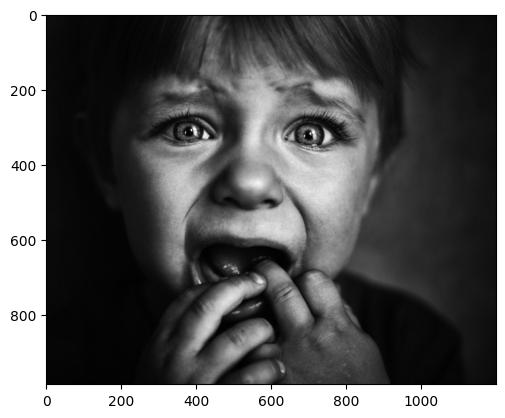

In [70]:
# Show the image in RGB from

plt.imshow(cv2.cvtColor(img_read,cv2.COLOR_BGR2RGB))

## Using HAAR Cascade for facial detection

In [71]:
# Obtaining the face cascade

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

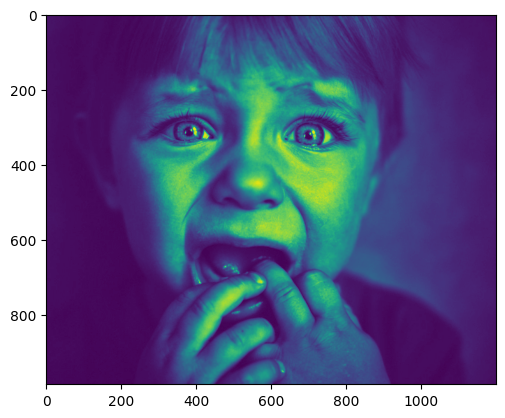

In [72]:
# Converting to grayscale - HAAR Cascade uses grayscale

img_grayscale = cv2.cvtColor(img_read,cv2.COLOR_BGR2GRAY)
plt.imshow(img_grayscale)

In [73]:
img_grayscale.shape

(986, 1200)

In [74]:
# Initialise HAAR Cascade

faces = face_cascade.detectMultiScale(
        img_grayscale,
        scaleFactor=1.1,  # Parameter specifying how much the image size is reduced at each image scale.
        minNeighbors=5,   # Parameter specifying how many neighbors each candidate rectangle should have to retain it.
        minSize=(100,100),  # Minimum possible object size. Objects smaller than that are ignored.
        flags = cv2.CASCADE_SCALE_IMAGE
    )

for (x,y,w,h) in faces:
    cv2.rectangle(img_read,(x,y),(x+w,y+h) , (0,255,0) , 2)

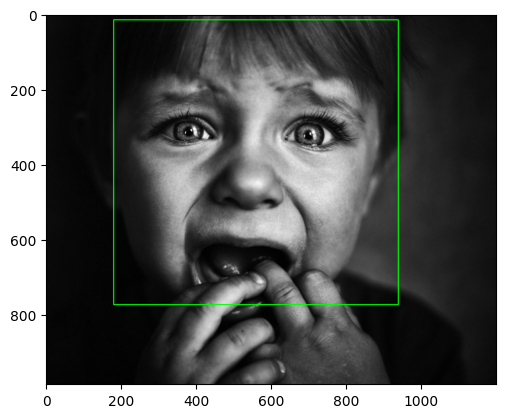

In [75]:
# See the final image
plt.imshow(cv2.cvtColor(img_read,cv2.COLOR_BGR2RGB))

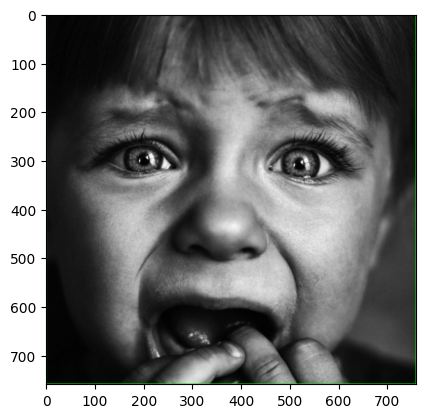

In [76]:
# Convert the image to grayscale
img_grayscale = cv2.cvtColor(img_read, cv2.COLOR_BGR2GRAY)

# Load the pre-trained face cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces
faces = face_cascade.detectMultiScale(img_grayscale, scaleFactor=1.1, minNeighbors=4)

# Select the largest face
'''
If faces are detected, this line of code uses the max function to find the face with the maximum area. The max function takes an iterable (faces in this case) and a key function (specified using the key parameter) to determine the maximum element based on the specified key.

The key=lambda x: (x[2] * x[3]) part defines a lambda function (anonymous function) that takes an element x from the iterable (a detected face) and computes a value based on its width (x[2]) multiplied by its height (x[3]). This product represents the area of the rectangle enclosing the face.

So, the max function is finding the face with the maximum area among all the detected faces.
'''
if len(faces) > 0:
    largest_face = max(faces, key=lambda x: (x[2] * x[3]))  # Select the face with the largest area
    x, y, w, h = largest_face

    # Crop the face from the original color image
    face_crop_color = img_read[y:y+h, x:x+w]

    # Display the result
    plt.imshow(face_crop_color)

else:
    print('No face detected')

In [77]:
# Preprocessing the images for prediction

image_preprocessed = cv2.resize(face_crop_color,(224,224))   # resize for transfer learning
image_preprocessed = np.expand_dims(image_preprocessed,axis = 0)   # expanding dimension for channel rgb
image_preprocessed = image_preprocessed / 255.0

In [78]:
image_preprocessed.shape

(1, 224, 224, 3)

In [79]:
# Final prediction

predict_image = model_prediction.predict(image_preprocessed)

1/1 [==============================] - 0s 51ms/step


In [80]:
predict_image[0]

array([0.00533647, 0.03088677, 0.6460074 , 0.00912169, 0.00668973,
       0.22550398, 0.07645395], dtype=float32)

In [81]:
score_array = predict_image[0]

## Labels for images

* 0 --> Angry
* 1 --> Disgust
* 2 --> Fear
* 3 --> Happy
* 4 --> Neutral
* 5 --> Sad
* 6 --> Surprise

In [82]:
# Get the numerical class prediction using argmax

PREDICTED_EMOTION_CLASS = np.argmax(predict_image[0])

In [83]:
# Get the final class 

PREDICTED_EMOTION_CLASS

2

In [88]:
# Get probability score

PROBABILITY_SCORE = round(score_array[PREDICTED_EMOTION_CLASS],2)
PROBABILITY_SCORE

0.65

In [89]:
# Create the list of names

PREDICTED_EMOTION_CLASS_NAMES = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

In [90]:
# Name of the dominant emotion

FINAL_PREDICTION = PREDICTED_EMOTION_CLASS_NAMES[PREDICTED_EMOTION_CLASS]

print(f"The emotion showed by the person in the picture belongs to {FINAL_PREDICTION} category")

The emotion showed by the person in the picture belongs to Fear category


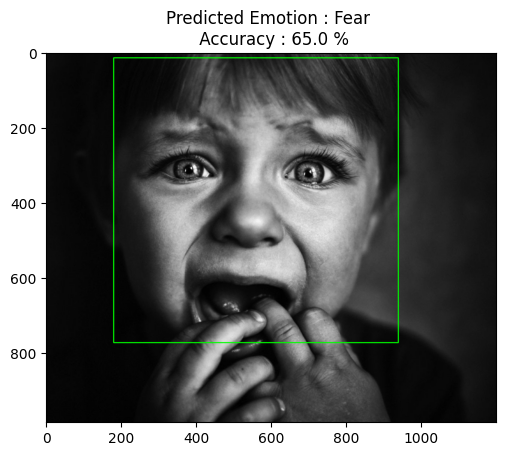

In [92]:
# Display

plt.title(f"Predicted Emotion : {FINAL_PREDICTION} \n Accuracy : {round(PROBABILITY_SCORE*100,2)} %")
plt.imshow(cv2.cvtColor(img_read,cv2.COLOR_BGR2RGB))